<a href="https://colab.research.google.com/github/issarbhavya/ML/blob/main/01_neural_network_regression_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Typical architecture of a regresison neural network



Hyperparamete:	Typical value

Input layer shape	: same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s)	Problem : specific, minimum = 1, maximum = unlimited

Neurons per hidden layer :	Problem specific, generally 10 to 

Output layer shape : 	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation :	Usually ReLU (rectified linear unit)
Output activation	: one, ReLU, logistic/

Loss function : MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if 

Optimizer	: SGD (stochastic gradient descent), Adam

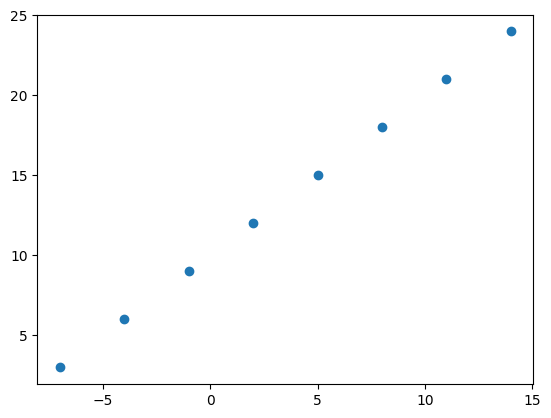

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) ## X is Independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) ## y is dependent variable


## Independent variable is usually written in caps, whereas dependent is written in lower case

# Visualize it
plt.scatter(X, y)

In [3]:
## how about for finding pattern, we manipulate x to get y 

print(X + 10) 

print(y)

## as you can see both are same

[ 3.  6.  9. 12. 15. 18. 21. 24.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]


so, basically this is the relationship we want our neural network to learn.

this is the realationship between ur Independent and dependent variable

---



## Regression input shapes and output shapes


One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

In [4]:
## Creating a demo for our housing price prediction problem

import tensorflow as tf

# basically here input and output shapes of a regresson model are converted to tensors
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)



---


Our goal here will be to use X to predict y.

So our input will be X and our output will be y.




In [5]:
### lets check the input nd output shape 

# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

((), ())

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

examples like these don't really make sense but what we basically need to do is, get one x vale nd return one y value

In [6]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [7]:
X.shape,   y.shape

((8,), (8,))

In [8]:
X[0].shape,   y[0].shape

((), ())

confusion with the output since we have no dimension, that is, it is a scalar value

In [9]:
## converting our numpy array to tensorflow
X=tf.constant(X)
y=tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
X[0].shape,   y[0].shape

(TensorShape([]), TensorShape([]))

same confusion ,



In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

---




So, now our question is how we will build a model to figure out the realtionship here




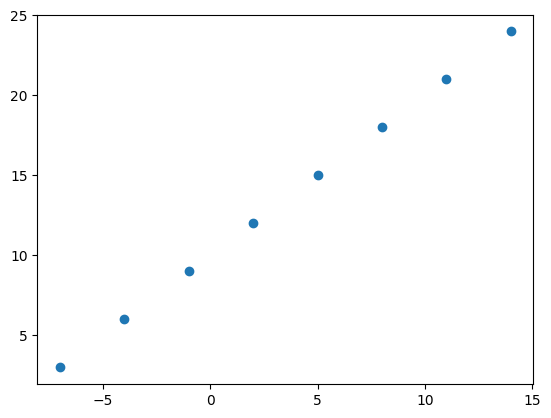

In [11]:
plt.scatter(X, y)

### Steps in modeling a Tensor Flow



---


**1 Creating a model-** 

a. define the **input and output layers**

b. define **hidden layer** for deep learning

---
**2 compiling a model-**

a. define **loss function**(tells us how wrong our model is)

b. define **optimizer** (tells our model to improve patterns it is learning)

c. **Evaluation metrics**(to find out ways to understand model decision making policies better)

---
**3 fitting a model-**

Letting model to try nd find patterns between X nd y(features and labels)

---






In [12]:
tf.random.set_seed(42)




## 1. Creating model using Sequential API
"""
in tensorflow nd keras there are basically two types of apis, Sequential nd functional

"""

model = tf.keras.Sequential([
# this basically tells tensorflow that i want to create a model nd want it to go sequentially through it 
  
   
   tf.keras.layers.Dense(1)   
   # the following is our input layer, we have used "1",
   # as we want our model to take input of one number 
])


## 2. compile the model

model.compile(loss=tf.keras.losses.mae,  # mae : mean absolute error
             # the above line computes mean absolute error between labels and prediction

             # so this basically tells us that on an avg
             # how wrong the predictions(y_pred) are compared to true values(y_true)
             
             optimizer= tf.keras.optimizers.SGD(), # sgd : stochasitc gradient descent
             # it tells neural network how to improve
              
             metrics=["mae"]
             ) 


## 3. fit the model

# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+


model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
# epochs=5 means 5 laps/oppertunities to go through all of the
# X nd y values nd find out the patters/relatoinships

Epoch 1/5
1/1 [==============================] - 1s 592ms/step - loss: 14.6820 - mae: 14.6820
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 14.5495 - mae: 14.5495
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.4170 - mae: 14.4170
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 14.2845 - mae: 14.2845
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 14.1520 - mae: 14.1520




---


Thus we have trained our model

now let's chaek it with X nd y



In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[-2.7162895]], dtype=float32)

the answer must be 27, but still it is close to it, as we can see that after training of 5 laps, loss is still 8.34 

In [14]:
model.predict([22.0])

1/1 [==============================] - 0s 45ms/step


array([[-3.5299041]], dtype=float32)

In [15]:
model.predict([39.0])

1/1 [==============================] - 0s 42ms/step


array([[-6.2961936]], dtype=float32)

Thus as we can see, that for different different predictions, the answers are still not matching nd sometimes difference in expected result is more nd sometimes its less

## Improving our model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).



---
we can convert the smaller model to bigger nd improved model step by step, so follwing ways are (check the differences)


In [16]:
#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) ## laps has been changed to 100

Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 13.8537 - mae: 13.8537
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7212 - mae: 13.7212
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5887 - mae: 13.5887
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4562 - mae: 13.4562
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3237 - mae: 13.3237
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1912 - mae: 13.1912
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0587 - mae: 13.0587
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9262 - mae: 12.9262
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7937 - mae: 12.7937
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6612 - mae: 12.6612
Epoch 11/100
1/1 [==============================]

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 129ms/step


array([[29.504414]], dtype=float32)

In [18]:
model.predict([22.0])

1/1 [==============================] - 0s 153ms/step


array([[37.92409]], dtype=float32)



---



---



In [19]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [20]:
X=tf.expand_dims(X,axis=-1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [21]:
## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),

    
    # adding more hidden layers, with 100 neurons 
    # it might show that the loss has reduced, but effictively won't improve the outcome


    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 628ms/step - loss: 13.5062 - mae: 13.5062
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9305 - mae: 12.9305
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3562 - mae: 12.3562
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7714 - mae: 11.7714
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1967 - mae: 11.1967
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5987 - mae: 10.5987
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.9883 - mae: 9.9883
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3702 - mae: 9.3702
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0126 - mae: 8.0126
Epoch 11/100
1/1 [==============================] - 0s 1

In [22]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 185ms/step


array([[31.262434]], dtype=float32)

In [24]:
## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    # we have reduced the number of neurons, changed activation to None
    
    
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 473ms/step - loss: 12.9571 - mae: 12.9571
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4130 - mae: 12.4130
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8646 - mae: 11.8646
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3091 - mae: 11.3091
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7436 - mae: 10.7436
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1652 - mae: 10.1652
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5709 - mae: 9.5709
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9576 - mae: 8.9576
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3223 - mae: 8.3223
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6615 - mae: 7.6615
Epoch 11/100
1/1 [==============================] - 0s 8ms/ste

In [25]:
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[32.030952]], dtype=float32)

very near, but still for 22 its not that precise

In [26]:
model.predict([22.0])

1/1 [==============================] - 0s 39ms/step


array([[40.476963]], dtype=float32)



---



---
We need to try different different methods in training our model to get an more nd more precise results


In [27]:
# learning_rate is the most important change we can make to our neural network


## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    # we have reduced the number of neurons, changed activation to None
    
    
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              ## changing optimisation function and changing lr to 0.01,which by default is 0.001
              
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 14.2504 - mae: 14.2504
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5646 - mae: 13.5646
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8759 - mae: 12.8759
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1839 - mae: 12.1839
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4882 - mae: 11.4882
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7874 - mae: 10.7874
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0797 - mae: 10.0797
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3623 - mae: 9.3623
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6324 - mae: 8.6324
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8872 - mae: 7.8872
Epoch 11/100
1/1 [==============================] - 0s 9



---


Lowest loss till now 



---




In [28]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[27.321722]], dtype=float32)

In [29]:
model.predict([22.0])

1/1 [==============================] - 0s 50ms/step


array([[32.460133]], dtype=float32)



---


Best output till now

---



### Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

.
.
.


> *Visualize, visualize, visualize*



The data - what data are you working with? What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?






In [30]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [32]:
# making label
y=X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])



---



**Split data into training/test set**

*Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester)*.

.


*Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).*

.


*Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester). *

In [33]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

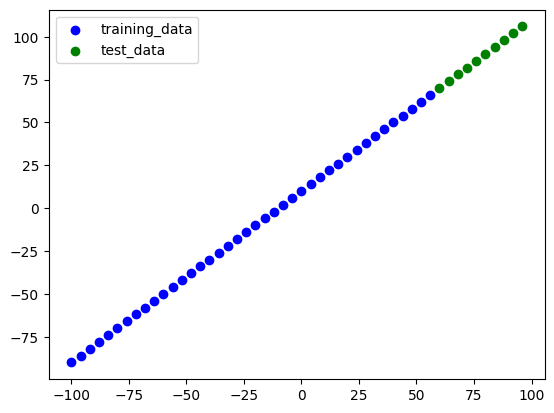

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train, c="b" ,label="training_data")
plt.scatter(X_test,y_test, c="g", label="test_data")

plt.legend()

In [38]:
### creating neural network which builds automaticallyby defining input_shape argument

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # we wrote "1" since we'r passing 1 no. to predict 1 no.
])

#compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
# model.fit(X_train,y_train,epochs=100)              

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

.



> Total params - total number of parameters in the model.(X nd y)





> Trainable parameters - these are the parameters (patterns) the model can update as it trains.

> Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).







In [47]:
#### let's change our model to have 10 hidden layers in imput layer

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"), # input shape=1 nd output shape =10
    tf.keras.layers.Dense(1, name="output_layer")
])

#compile 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [48]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [49]:
# Check the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


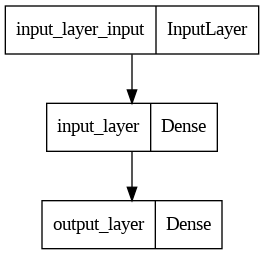

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model)

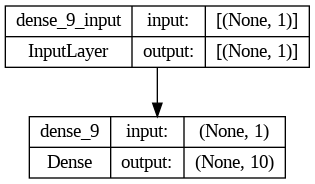

In [45]:
# plot_model(model, show_shapes=True) commenting it out, coz added output_layer to model

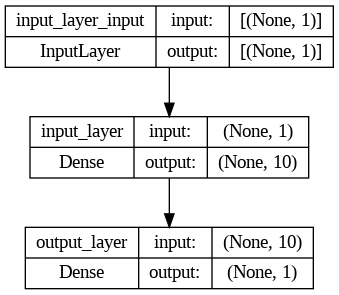

In [51]:
### after adding output_layer and adding names to all

plot_model(model, show_shapes=True)